In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("C:\\Users\\esrao\\OneDrive\\Masaüstü\\19010101025-190101040\\Churn_Modelling.csv")

In [5]:
df.shape

(10000, 14)

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [22]:
print(df.isnull().sum())


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [24]:
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [25]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

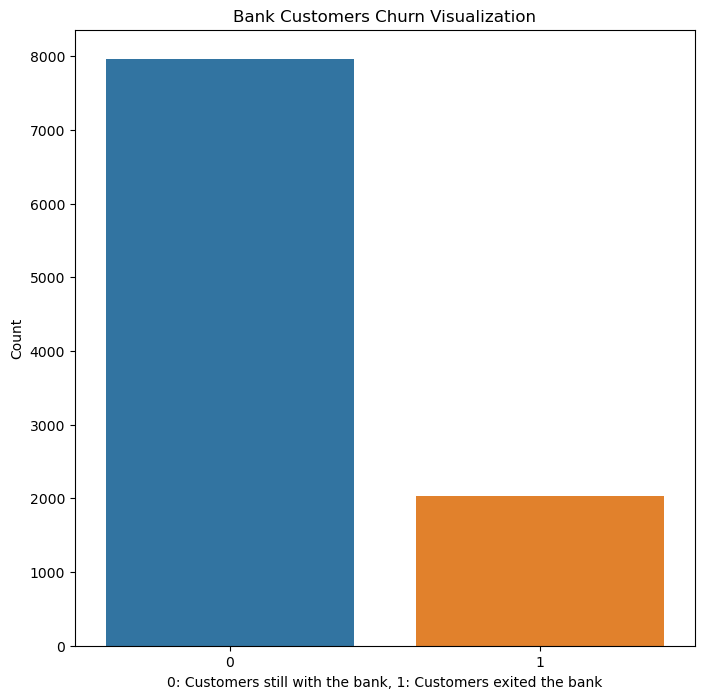

In [27]:
plt.figure(figsize=(8,8))
sns.countplot(x='Exited', data=df)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

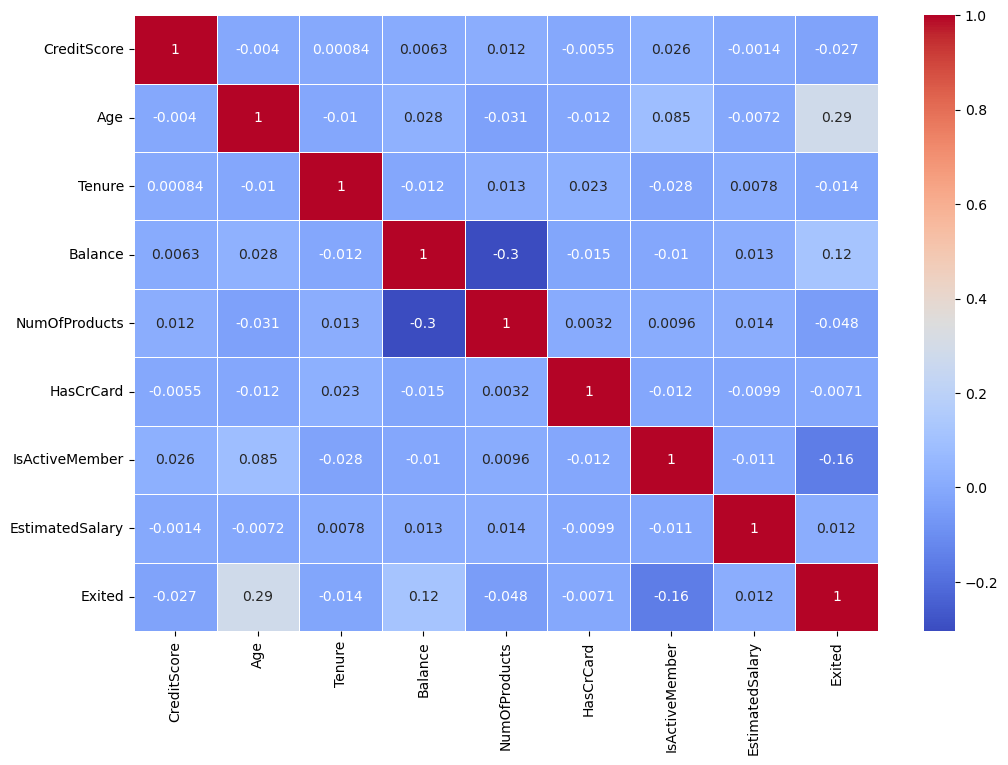

In [28]:
# Sadece sayısal sütunların seçilmesi
numeric_df = df.select_dtypes(include=[float, int])

# Korelasyon matrisini hesaplanması
corr_matrix = numeric_df.corr()

# Korelasyon matrisi görselleştirilmesi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


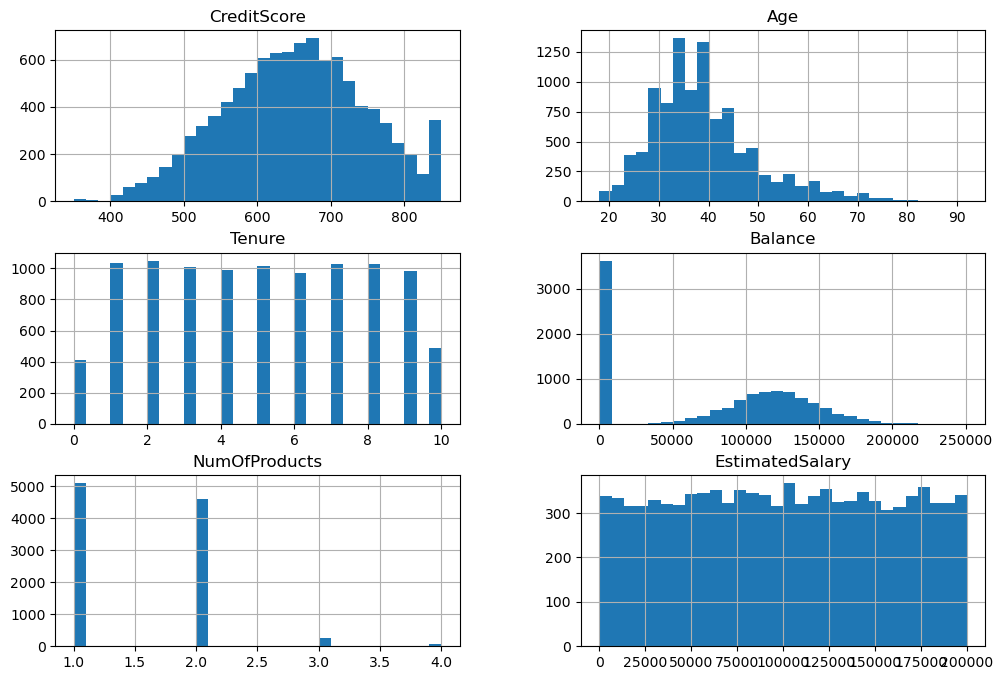

In [17]:
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numeric_features].hist(bins=30, figsize=(12, 8))
plt.show()

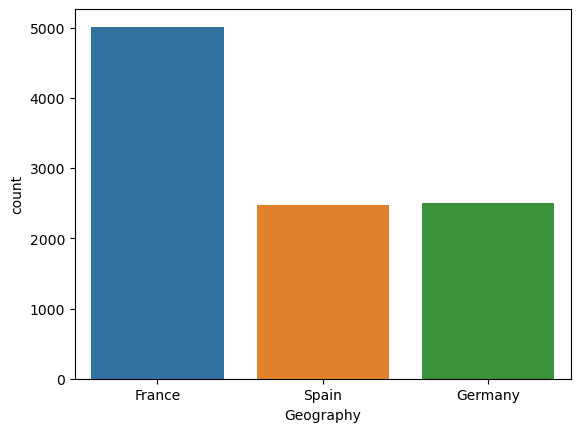

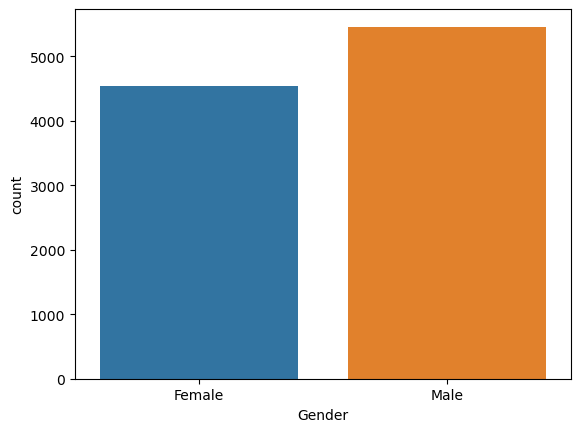

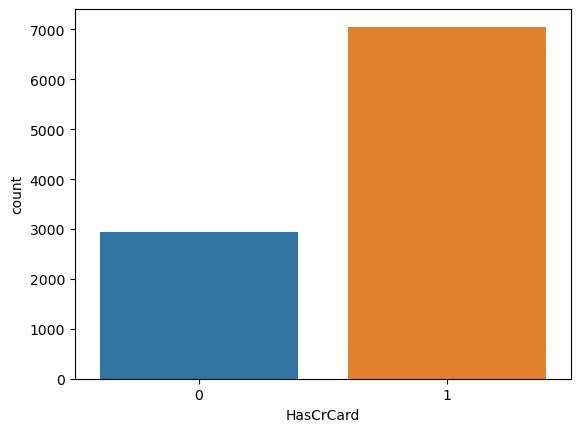

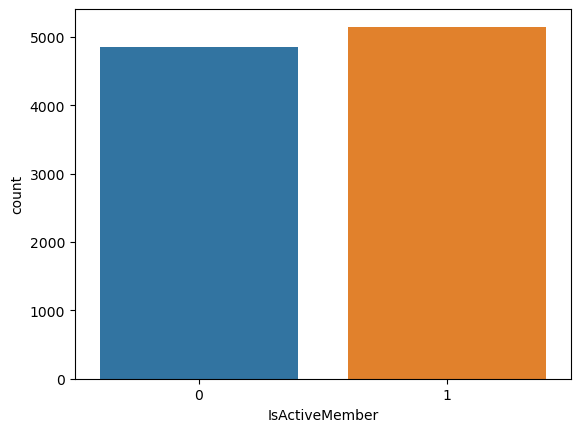

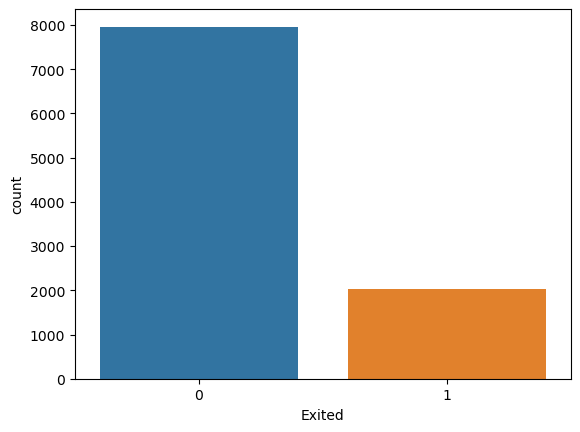

In [18]:
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
for feature in categorical_features:
    sns.countplot(x=feature, data=df)
    plt.show()

In [29]:
geography = pd.get_dummies(df['Geography'], drop_first=True)
gender = pd.get_dummies(df['Gender'], drop_first=True)

In [30]:
df = pd.concat([df, geography, gender], axis=1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [31]:
df.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [32]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (8000, 11), X_test size: (2000, 11)


In [34]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,True,False,False
4859,794,22,4,114440.24,1,1,1,107753.07,False,True,False
3264,738,35,5,161274.05,2,1,0,181429.87,False,False,True
9845,590,38,9,0.00,2,1,1,148750.16,False,True,False


In [35]:
y_train

7389    0
9275    0
2995    0
5316    0
356     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 8000, dtype: int64

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [38]:
classifier = Sequential()

In [39]:
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

In [40]:
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [41]:
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [42]:
import tensorflow as tf

In [43]:
classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [44]:
model_history = classifier.fit(X_train, y_train, batch_size=10, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100


800/800 [==============================] - 2s 1ms/step - loss: 0.5492 - accuracy: 0.7526 - val_loss: 0.4648 - val_accuracy: 0.7975
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4497 - accuracy: 0.7960 - val_loss: 0.4420 - val_accuracy: 0.7975
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4384 - accuracy: 0.7960 - val_loss: 0.4345 - val_accuracy: 0.7975
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4335 - accuracy: 0.7965 - val_loss: 0.4284 - val_accuracy: 0.7995
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4283 - accuracy: 0.8083 - val_loss: 0.4221 - val_accuracy: 0.8180
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4232 - accuracy: 0.8130 - val_loss: 0.4163 - val_accuracy: 0.8230
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4183 - accuracy: 0.8211 - val_loss: 0.4126 - val_accuracy: 0.82

Epoch 55/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3351 - accuracy: 0.8631 - val_loss: 0.3353 - val_accuracy: 0.8605
Epoch 56/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3345 - accuracy: 0.8643 - val_loss: 0.3359 - val_accuracy: 0.8605
Epoch 57/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3351 - accuracy: 0.8643 - val_loss: 0.3376 - val_accuracy: 0.8585
Epoch 58/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3343 - accuracy: 0.8650 - val_loss: 0.3440 - val_accuracy: 0.8565
Epoch 59/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3354 - accuracy: 0.8639 - val_loss: 0.3374 - val_accuracy: 0.8600
Epoch 60/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3347 - accuracy: 0.8637 - val_loss: 0.3395 - val_accuracy: 0.8605
Epoch 61/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3345 - accuracy: 0.8652 - val_loss: 0.3380 - val_accuracy:

In [45]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

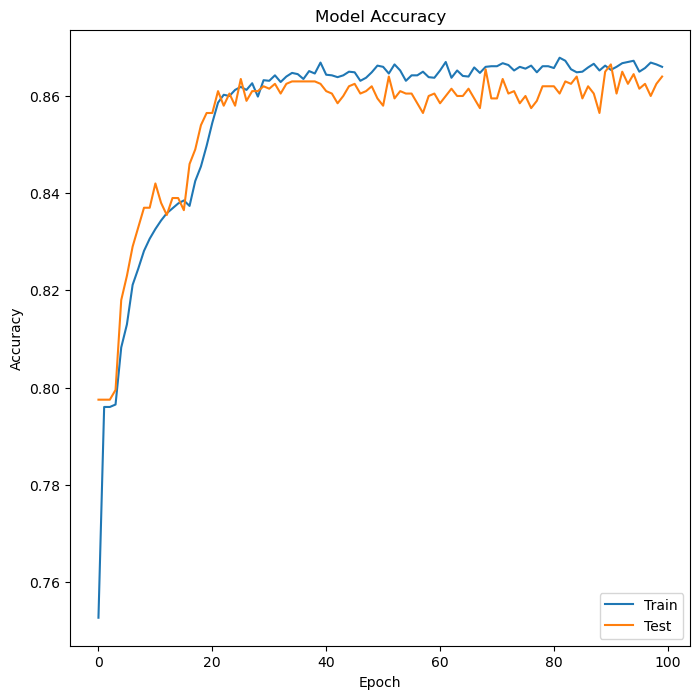

In [46]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

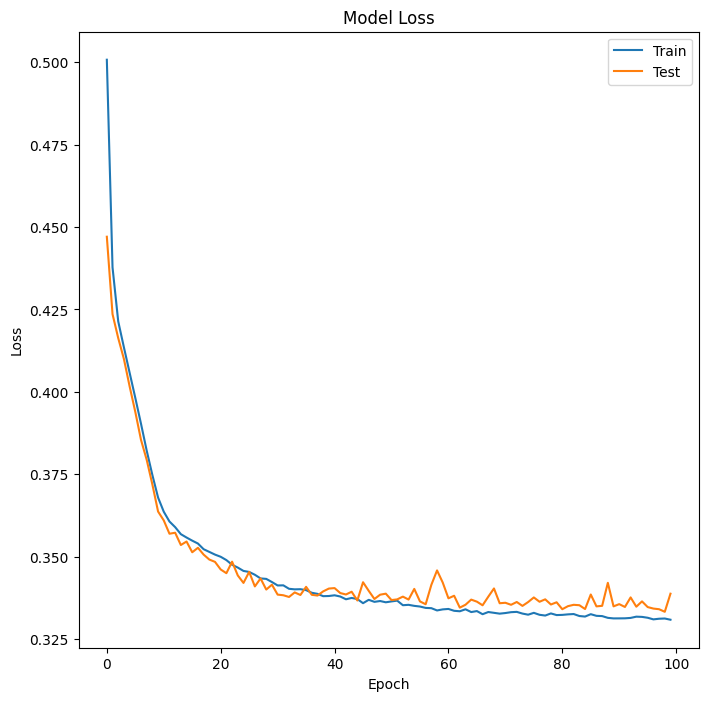

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [52]:
y_pred = classifier.predict(X_test)

63/63 [==============================] - 0s 3ms/step


In [53]:
y_pred

array([[0.2849149 ],
       [0.29501644],
       [0.13442448],
       ...,
       [0.10575549],
       [0.18490463],
       [0.24509966]], dtype=float32)

In [54]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1522,   73],
       [ 199,  206]], dtype=int64)

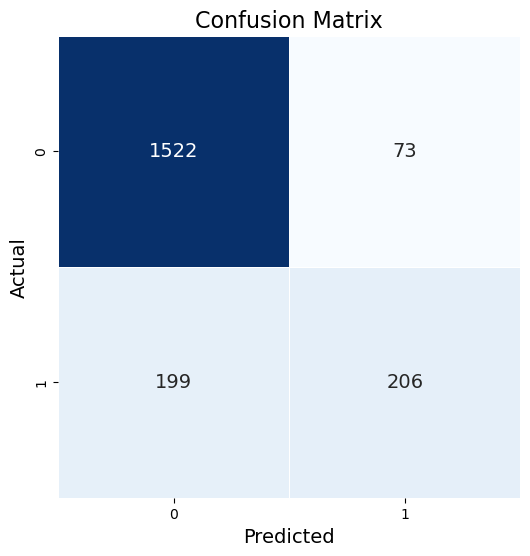

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 14}, linewidths=0.5, square=True)

plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.show()

In [57]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 86.4%


In [58]:
def predict_exit(sample_value):

  sample_value = np.array(sample_value)

  sample_value = sample_value.reshape(1, -1)

  sample_value = sc.transform(sample_value)

  return classifier.predict(sample_value)

In [59]:

sample_value = [738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

1/1 [==============================] - 0s 20ms/step
Prediction: Low change of exit.


C:\Users\esrao\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [60]:

sample_value = [805, 45, 9, 116585.97, 1, 1, 0, 189428.75, 1, 0, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

1/1 [==============================] - 0s 21ms/step
Prediction: High change of exit!


C:\Users\esrao\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [61]:
from keras.models import load_model

In [62]:
classifier.save('model.h5')

C:\Users\esrao\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
